<a href="https://colab.research.google.com/github/pylabview/sales-predicctions/blob/main/DS_Sales_Predicctions_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Data Science Sales Predicction
Rodrigo Arguello-Serrano

>This first project will be a sales prediction for food items sold at various stores. The goal of this is to help the retailer understand the properties of products and outlets that play crucial roles in increasing sales.

<a name="TOC"></a>
#🗂  Table of Contents
1. [🖌 Project 1 - Parts 1 & 2: Source Control and Data Cleaning](#1)
  - [📒 Data Dictionary ](#1.1)
  - [Module Imports & Mounting Goolgle Drive](#1.2)
  - [Loading Data](#1.3)
  - [🧽 Data Cleaning](#1.4)
2. [📊 Project 1 - Part 3](#3)
  - [Exploratory Data](#3.1)
  - [EDA Numerical Columns (Histograms & Boxes)](#3.2)
  - [EDA Categorical Columns (Barplots)](#3.3)
  - [Heat Map (Correlated Features)](#3.5)
3. [📊 Project 1 - Part 4: Explanatory Visuals & Analysis](#4)
4. [⚙️ Project 1 - Part 5: Preprocesing for Machine Learning](#5)
  - [Import all libraries, Load Data & make a copy of the df](#5.1)
  - [Check for duplicates, missing values, errors](#5.2)
  - [Split the Data (Validation Split)](#5.3)
  - [Column Selector](#5.4)
  - [Transformers](#5.5)
  - [Pipeline Numeric Data and a Pipeline for Categorical Data](#5.6)
  - [Tuples](#5.7)
  - [ColumnTransformer](#5.8)
  - [Transform Both Training and Testing Data](#5.9)
5. [📐 Project 1 - Part 6: Maching Learning - Training the Models](#6)
  - [🐍 Functions](#6.1)
  - [▶ Model Data: Baseline Model (Dummy)](#6.2)
  - [▶ Model Data: Linear Regression Model](#6.3)
  - [▶ Model Data: Decision Tree Regressor Model](#6.4)
    - [High Bias Version](#6.5)
    - [High Variance Version](#6.6)
    - [Bias Variance Balancec Version](#6.7)
    - [🚀 Reevaluating Decision Tree Model](#6.8)
  - [▶ Model Data: Ramdom Forest Model](#6.9)
    - [Creating a Loop to Tune n_estimators for Random Forest Regressor Model](#6.10)
    - [Plotting Scores for Random Forest Train & Test Visually](#6.11)
    - [Best n_estimators for Random Forest Model](#6.12)
    - [🚀 Reevaluating Random Forest Regressor Model](#6.13)
  - [📕 Observations and Recommendations](#6.14)




<a name="1"></a>
#Project 1 - Parts 1 & 2: Source Control and Data Cleaning

⬅️[Go back to TOC](#TOC)

Part 1: Seeting GitHub Repo

[Project GitHub Repo](https://github.com/pylabview/sales-predicctions/tree/main)

Part 2

We will be performng the following activities:

- Number of rows and columns.
- Dataframe datatypes of each variable.
- Removing duplicates.
- Identify missing values.
- Define strategy to address missing values.
- Confirm that there are no missing values after addressing them.
- Find and fix any inconsistent categories of data.
- For any numerical columns, obtain the summary statistics of each (min, max, mean).

<a name="1.1"></a>
###📒 Data Dictionary 
<table>
  <tr>
    <th>Variable Name</th>
    <th>Description</th>
  </tr>
  <tr>
    <td>Item_Identifier</td>
    <td>Unique product ID</td>
  </tr>
  <tr>
    <td>Item_Weight</td>
    <td>Weight of product</td>
  </tr>
  <tr>
    <td>Item_Fat_Content</td>
    <td>Whether the product is low fat or regular</td>
  </tr>
  <tr>
    <td>Item_Visibility</td>
    <td>The percentage of total display area of all products in a store allocated to the particular product</td>
  </tr>
  <tr>
    <td>Item_Type</td>
    <td>The category to which the product belongs</td>
  </tr>
  <tr>
    <td>Item_MRP</td>
    <td>Maximum Retail Price (list price) of the product</td>
  </tr>
  <tr>
    <td>Outlet_Identifier</td>
    <td>Unique store ID</td>
  </tr> 
  <tr>
    <td>Outlet_Establishment_Year</td>
    <td>The year in which store was established</td>
  </tr> 
  <tr>
    <td>Outlet_Size</td>
    <td>The size of the store in terms of ground area covered</td>
  </tr> 
  <tr>
    <td>Outlet_Location_Type</td>
    <td>The type of area in which the store is located</td>
  </tr> 
  <tr>
    <td>Outlet_Type</td>
    <td>	Whether the outlet is a grocery store or some sort of supermarket</td>
  </tr> 
  <tr>
    <td>Item_Outlet_Sales</td>
    <td>Sales of the product in the particular store. This is the target variable to be predicted.</td>
  </tr> 
</table>

<a name="1.2"></a>
## Module Imports & Mounting Goolgle Drive

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
from google.colab import drive
#Setting plots styles
plt.style.use(['dark_background','seaborn-muted', 'seaborn-poster'])
#Moubt Gogle Drive
drive.mount('/content/drive')

Mounted at /content/drive


<a name="1.3"></a>
## Loading Data

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Assignments/Data/sales_predictions.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
# Setting Item_Identifier column as index
df.set_index('Item_Identifier', inplace=True)
#Cheking the head again
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,,,,,,,,,,,
FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8523 entries, FDA15 to DRG01
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                7060 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                6113 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 799.0+ KB


<a name="1.4"></a>
## 🧽 Data Cleaning

In [5]:
# 1) How many rows and columns?
num_cols,num_rows = df.shape
print(f"Number of Columns: {num_cols}, Number or rows: {num_rows}")

Number of Columns: 8523, Number or rows: 11


In [6]:
# 2) What are the datatypes of each variable?
df.dtypes

Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [7]:
# Are there duplicates? If so, drop any duplicates.
dups = df.duplicated().sum()
print(f"Number of duplicates: {dups}")

Number of duplicates: 0


In [8]:
# 4) Identify missing values.
total_missing_series = df.isna().sum()
total_missing_series_idx = df.isna().sum().index
total_cols = len(total_missing_series_idx )

for i in range(total_cols):
  if total_missing_series[i] > 0:
    print(f"Row index {total_missing_series_idx[i]}, number of missing {total_missing_series[i]}")

Row index Item_Weight, number of missing 1463
Row index Outlet_Size, number of missing 2410


In [9]:
# Inputing missing data for Item_Weight with the column average, as the data type is a float
df['Item_Weight'].fillna(value = df['Item_Weight'].mean(), inplace = True)

#Dropping Outlet_Size, the misssing values are >5% and this column should not affect the food sales prediction

df.drop(columns=['Outlet_Size'],inplace=True)



In [10]:
# 6) Confirm that there are no missing values after addressing them.
print(f"Are All missing values removed? {df.isna().sum().sum()==0}")

Are All missing values removed? True


In [11]:
# 7) Find and fix any inconsistent categories of data 
## Item_Fat_Content

df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [12]:
#Repalcing inconsisten values: 'low fat', 'LF', 'reg'
df.replace({'low fat': 'Low Fat',
            'LF': 'Low Fat',
            'reg':'Regular'}, inplace = True)

In [13]:
#Cheking everything is OK!

df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [14]:
## Fixing Data Type for Outlet_Establishment_Year from float64 to datetime64

df['Outlet_Establishment_Year'] = pd.to_datetime(df['Outlet_Establishment_Year'])

In [15]:
#8) For any numerical columns, obtain the summary statistics of each (min, max, mean).
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,2181.288914
std,4.226124,0.051598,62.275067,1706.499616
min,4.555000,0.000000,31.290000,33.290000
25%,9.310000,0.026989,93.826500,834.247400
50%,12.857645,0.053931,143.012800,1794.331000
75%,16.000000,0.094585,185.643700,3101.296400
max,21.350000,0.328391,266.888400,13086.964800


<a name="3"></a>
# 📊 Project 1 - Part 3

⬅️[Go back to TOC](#TOC)

>The goal of this third part  is to understand the data as it relates to the products and outlets that play crucial roles in increasing sales. I will complete any statistical analyses that might help you to understand, explain, or model with your data. The following is inckuded:

>- Histogram to view the distributions of various features in your dataset.
- Boxplot to view statistical summaries of various features in your dataset.
- Heatmap of the correlation between features.


<a name="3.1"></a>
## Exploratory Data

⬅️[Go back to TOC](#TOC)

- Approaches
We will go Column-by-Column with the EDA using a function (plus markdown interpretations for each)

In [16]:
# Checking info again
df.info()

# Converting back Outlet_Establishment_Year form datetime to int64
df = df.astype({'Outlet_Establishment_Year': 'int'})


<class 'pandas.core.frame.DataFrame'>
Index: 8523 entries, FDA15 to DRG01
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Item_Weight                8523 non-null   float64       
 1   Item_Fat_Content           8523 non-null   object        
 2   Item_Visibility            8523 non-null   float64       
 3   Item_Type                  8523 non-null   object        
 4   Item_MRP                   8523 non-null   float64       
 5   Outlet_Identifier          8523 non-null   object        
 6   Outlet_Establishment_Year  8523 non-null   datetime64[ns]
 7   Outlet_Location_Type       8523 non-null   object        
 8   Outlet_Type                8523 non-null   object        
 9   Item_Outlet_Sales          8523 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(5)
memory usage: 732.4+ KB


<ipython-input-16-acef1667732d>:5: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  df = df.astype({'Outlet_Establishment_Year': 'int'})


- For each numeric feature, we will plot the distribution and a boxplot.

In [17]:
# Helper Function
def print_num_cols(df):
  num_columns = df.select_dtypes('number').columns
  return list(num_columns)

In [18]:
print_num_cols(df)

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

<a name="3.2"></a>
## EDA Numerical Columns (Histograms & Boxes)

⬅️[Go back to TOC](#TOC)

- Below, I chose to visual all columns:`Item_Outlet_Sales`, `Item_Visibility`, `Item_MRP` and `Item_Weight`.

`Item_MRP`: The retail price is relevant to the sales predition, as it makes it more accessible to all buyers.

`Item_Visibility`: The onsite marketing will include the items the buyers select, helping his sales.

`Item_Outlet_Sales`: include as it is the variable to be predicted.

`Item_Weight`: This feature might not affect the analysis/predition, but I am curious to see if so. 

In [19]:
 # Source : https://github.com/coding-dojo-data-science/Project1_Exemplar/blob/main/DS_Salaries.ipynb

def plot_numeric(df,col):
  """EDA function to plot a histogram and boxplot for the selected column"""
  ## make the figure and axes sharing the same x-axis
  fig, axes = plt.subplots(nrows=2, figsize=(10,5), sharex=True)

  ## Use seaborn plots with ax=axes[i]
  sns.histplot(data=df,x = col,ax = axes[0])
  mean_value = df[col].mean()
  axes[0].axvline(mean_value,color='red', ls='--', 
           label=f"Mean Value = ${mean_value:,.2f}",);

  med_value = df[col].median()
  axes[0].axvline(med_value,color='black', ls='--', 
           label=f"Median Value = ${med_value:,.2f}");


  sns.boxplot(data=df, x = col, ax = axes[1])

  ## Updating title of top graph 
  axes[0].set_title(f'EDA for {col}')

  ## Fixing any overlapping labels and showing
  plt.tight_layout()
  plt.show()

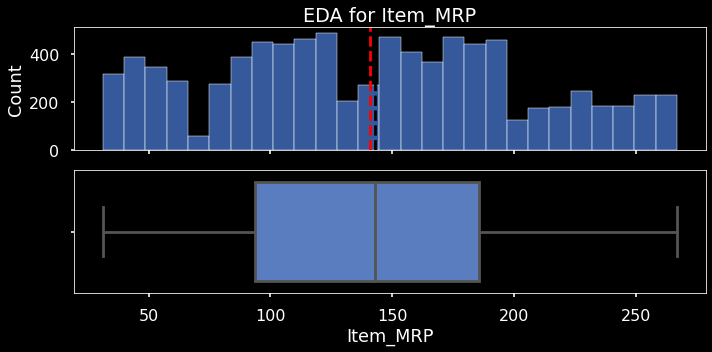

In [20]:
df_no_index = df.reset_index()
plot_numeric(df_no_index,'Item_MRP')

To comment

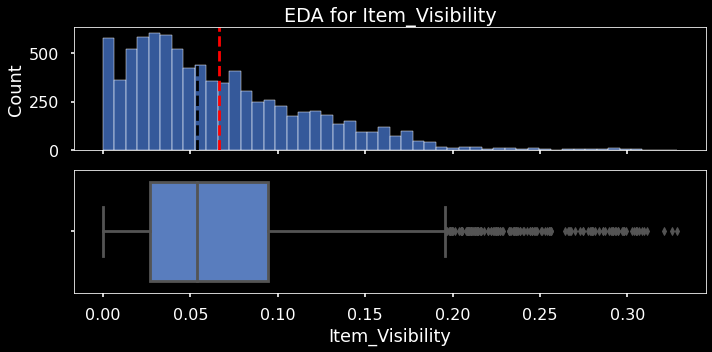

In [21]:
plot_numeric(df_no_index,'Item_Visibility')

Several outliers items with> 20% total display, and I am keeping them as they have a better chance of being sold. The rest is within the 75th percentile

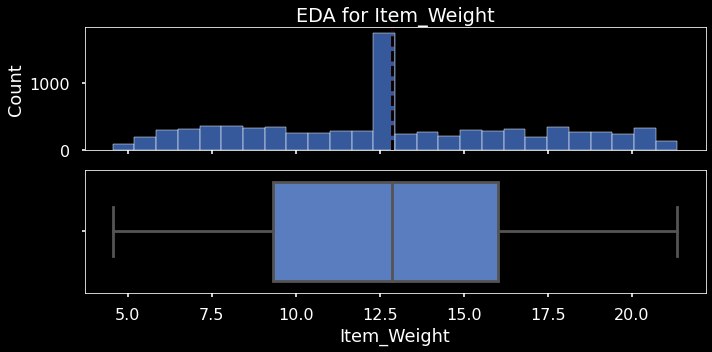

In [22]:
plot_numeric(df_no_index,'Item_Weight')

The mayority weight is ~12.5, there is not outliers

<a name="3.3"></a>
## EDA Categorical Columns (Barplots)
- We will view the categorical counts of all of the object type columns and visualize this information with a barplot. 

⬅️[Go back to TOC](#TOC)

In [23]:
## Source : https://github.com/coding-dojo-data-science/Project1_Exemplar/blob/main/DS_Salaries.ipynb
## functionize a barplot and call it plot_bar

def plot_bar(data,x, y, figsize=(20,5)):
    ## Make a larger fig/ax before plotting
    fig, ax = plt.subplots(figsize=figsize)

    ## Plot barplot
    
    ## counts, counts up the categories, sort the values, then puts them in a 
    ## data frame.
    
    counts = df[x].value_counts().sort_values(ascending=False).to_frame()
    ## ploting the barplot

    sns.barplot(data=counts,x=counts.index, y = counts[x],ax=ax)

    plt.xticks(rotation= 90)
    ax.set_title(f'Categorical Frequencies of {y}', fontsize = 20, fontweight = 'bold');
    ax.set_xlabel(f'Categories for {y}', fontsize = 15, fontweight = 'bold')
    ax.set_ylabel('Counts', fontsize = 15, fontweight = 'bold')

    return fig,ax

In [24]:
## Helper Funtion
def print_obj_cols(df):
  obj_columns = df.select_dtypes('object').columns
  print(f"""Dataset numeric columns count:
            {list(obj_columns)}""")

In [25]:
print_obj_cols(df)

Dataset numeric columns count:
            ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Location_Type', 'Outlet_Type']


Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64


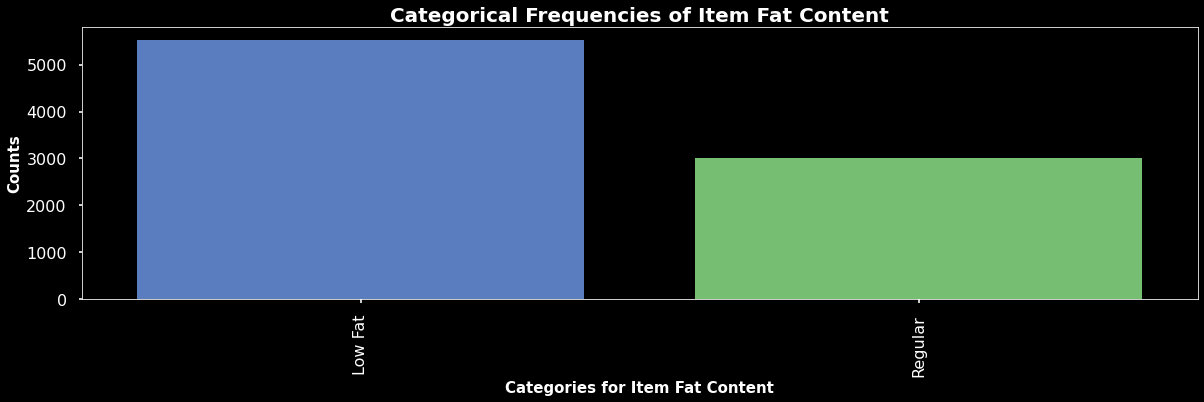

In [26]:
fig, ax = plot_bar(df, 'Item_Fat_Content', 'Item Fat Content');
print(df['Item_Fat_Content'].value_counts())

There are more Low Fat items; it could get a better chance of getting sold

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


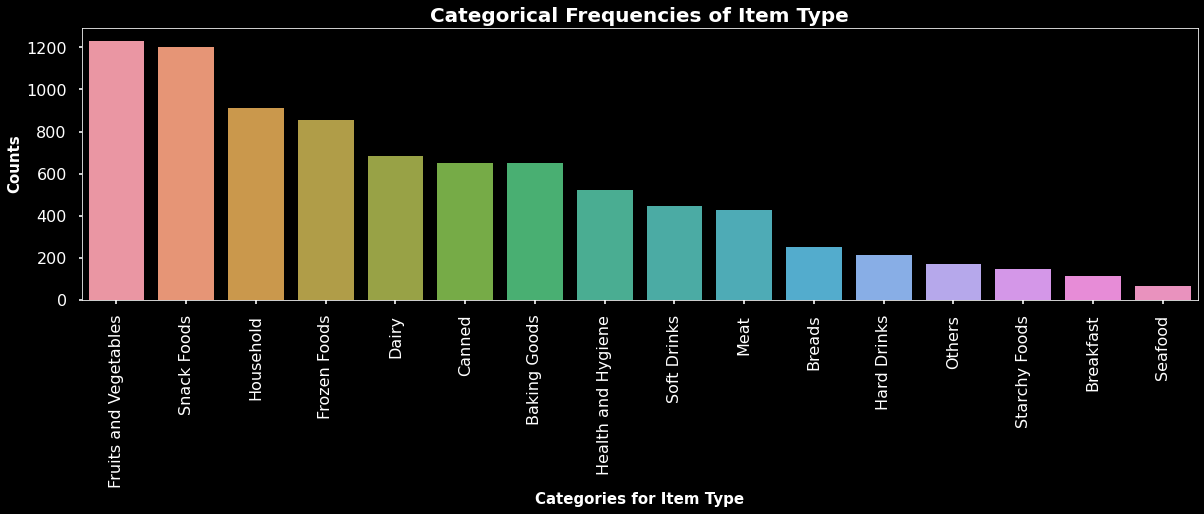

In [27]:
fig, ax = plot_bar(df, 'Item_Type', 'Item Type');
print(df['Item_Type'].value_counts())

Most items are fruits/Veggies & snacks, and Seafood a the fewer ones.

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64


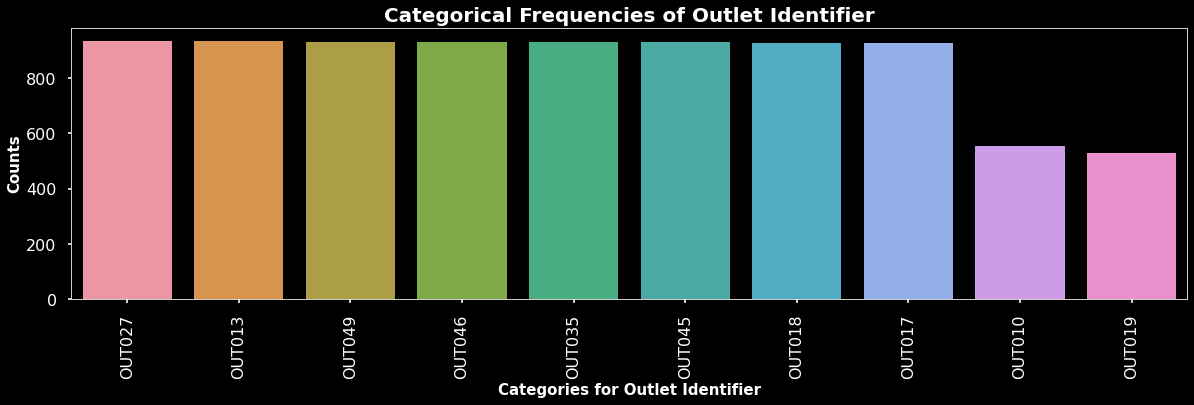

In [28]:
fig, ax = plot_bar(df, 'Outlet_Identifier', 'Outlet Identifier');
print(df['Outlet_Identifier'].value_counts())

Mostly of the stores offers ~900 counts, but 10 and 19

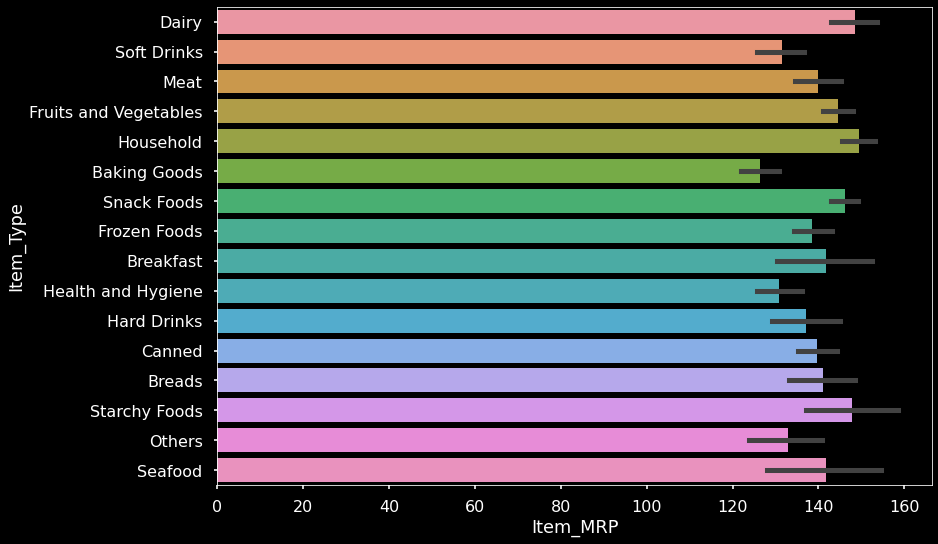

In [29]:
# Barplot with seaborn
sns.barplot(data=df, y='Item_Type', x='Item_MRP');

The MRP is about the same between all items

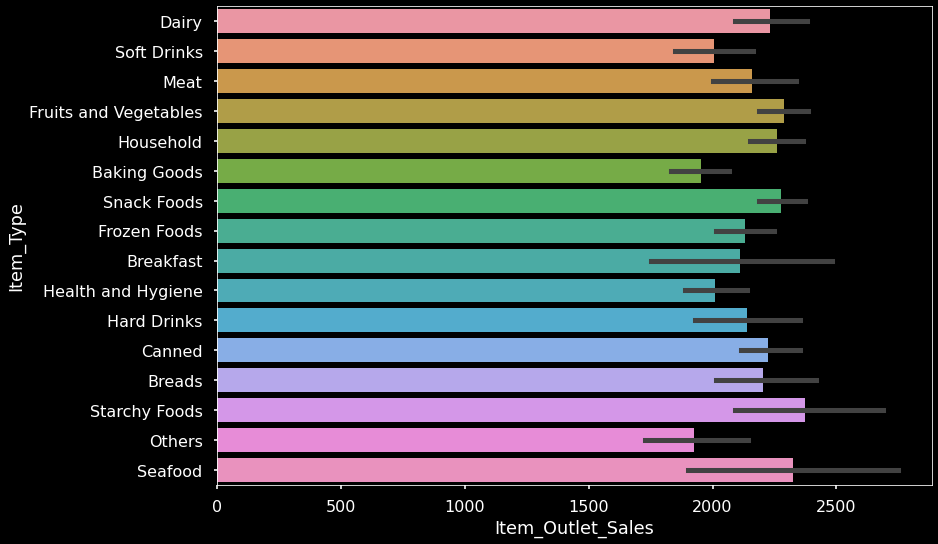

In [30]:
# Barplot with seaborn
sns.barplot(data=df, y='Item_Type', x='Item_Outlet_Sales');

Seafood and Starchy have higher Sales, and baking & Soft has lowest

<a name="3.4"></a>
## Heat Map (Correlated Features)

⬅️[Go back to TOC](#TOC)

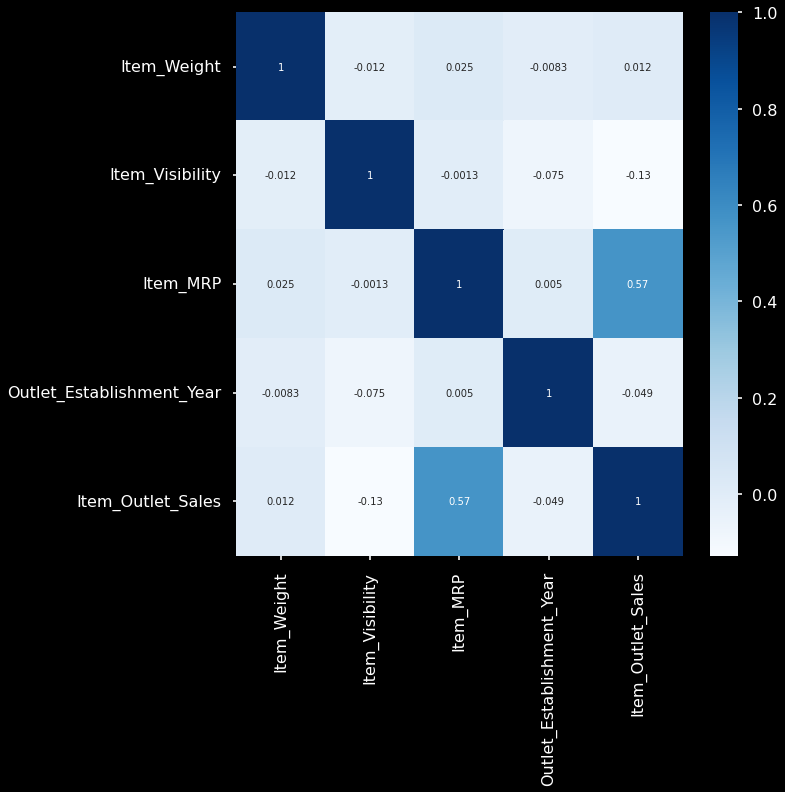

In [31]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='Blues');

There is a moderate correlatiom between Item_MRP and Item_Outlet_Sales

<a name="4"></a>
# 📊 Project 1 - Part 4: Explanatory Visuals & Analysis

⬅️[Go back to TOC](#TOC)

### Possible Questions to Answer:
- Which products sell the most?
- Which products sell the most by fat content?
- Which store has better sales?
- Which store sells more by establishment year?.
- Which store sells more by location type

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8523 entries, FDA15 to DRG01
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Location_Type       8523 non-null   object 
 8   Outlet_Type                8523 non-null   object 
 9   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 990.5+ KB


4.1 Which products sell the most?

In [33]:
Item_means = df.groupby(['Item_Type'])['Item_Outlet_Sales'].mean().sort_values(ascending=False)
Item_means

Item_Type
Starchy Foods            2374.332773
Seafood                  2326.065928
Fruits and Vegetables    2289.009592
Snack Foods              2277.321739
Household                2258.784300
Dairy                    2232.542597
Canned                   2225.194904
Breads                   2204.132226
Meat                     2158.977911
Hard Drinks              2139.221622
Frozen Foods             2132.867744
Breakfast                2111.808651
Health and Hygiene       2010.000265
Soft Drinks              2006.511735
Baking Goods             1952.971207
Others                   1926.139702
Name: Item_Outlet_Sales, dtype: float64

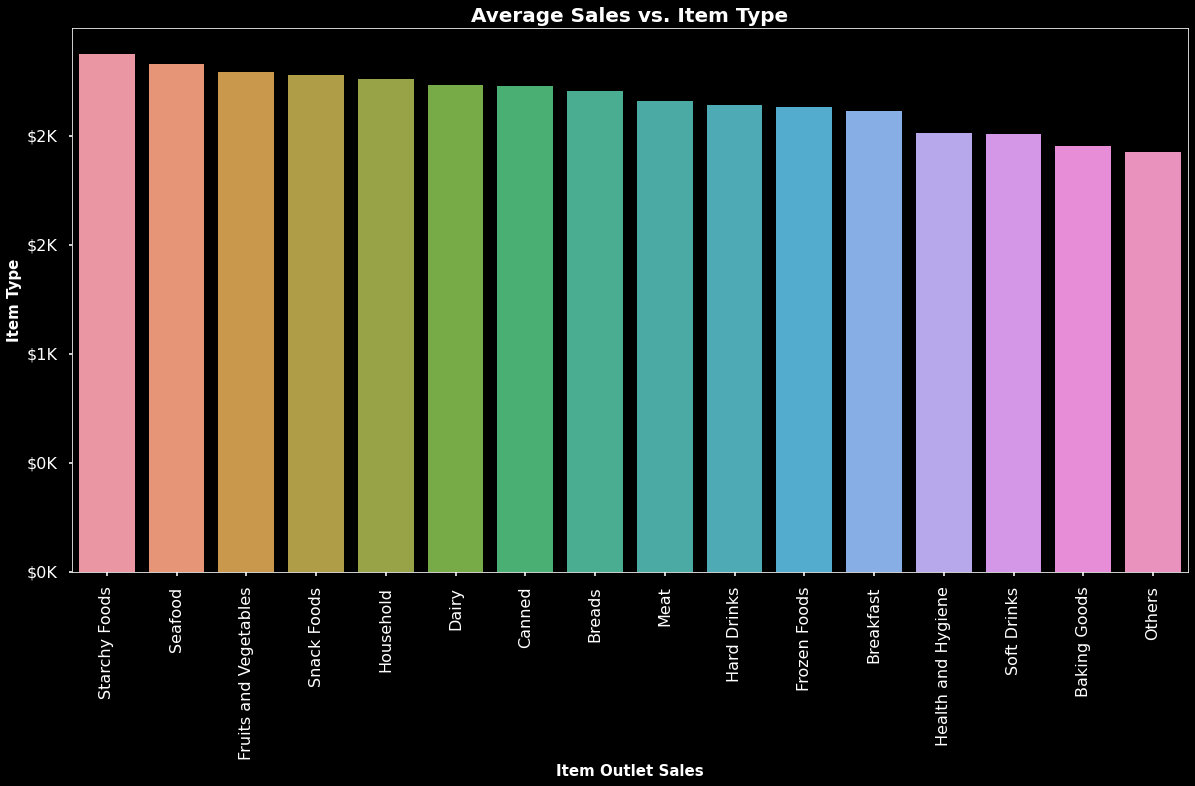

In [34]:

fig, ax = plt.subplots(figsize=(20,10))

ax = sns.barplot(data=df,x='Item_Type', y = 'Item_Outlet_Sales', order = Item_means.index, ci = None)
plt.xticks(rotation = 90)
ax.set_title('Average Sales vs. Item Type', fontsize = 20, fontweight = 'bold');
ax.set_xlabel('Item Outlet Sales', fontsize = 15, fontweight = 'bold')
ax.set_ylabel('Item Type', fontsize = 15, fontweight = 'bold');

def hundred_k(x,pos):
  """function for use with matplotlib FuncFormatter - formats money in millions"""
  return f'${x*1e-3:,.0f}K'

price_fmt_100k = FuncFormatter(hundred_k)

ax.yaxis.set_major_formatter(price_fmt_100k)

Starchy and Seafood has the better sales, Baking and other the lowest

4.2 Which products sell the most by fat content?

In [35]:
Fat_means = df.groupby('Item_Fat_Content')['Item_Outlet_Sales'].mean().sort_values(ascending=False)
Fat_means

Item_Fat_Content
Regular    2224.561170
Low Fat    2157.711534
Name: Item_Outlet_Sales, dtype: float64

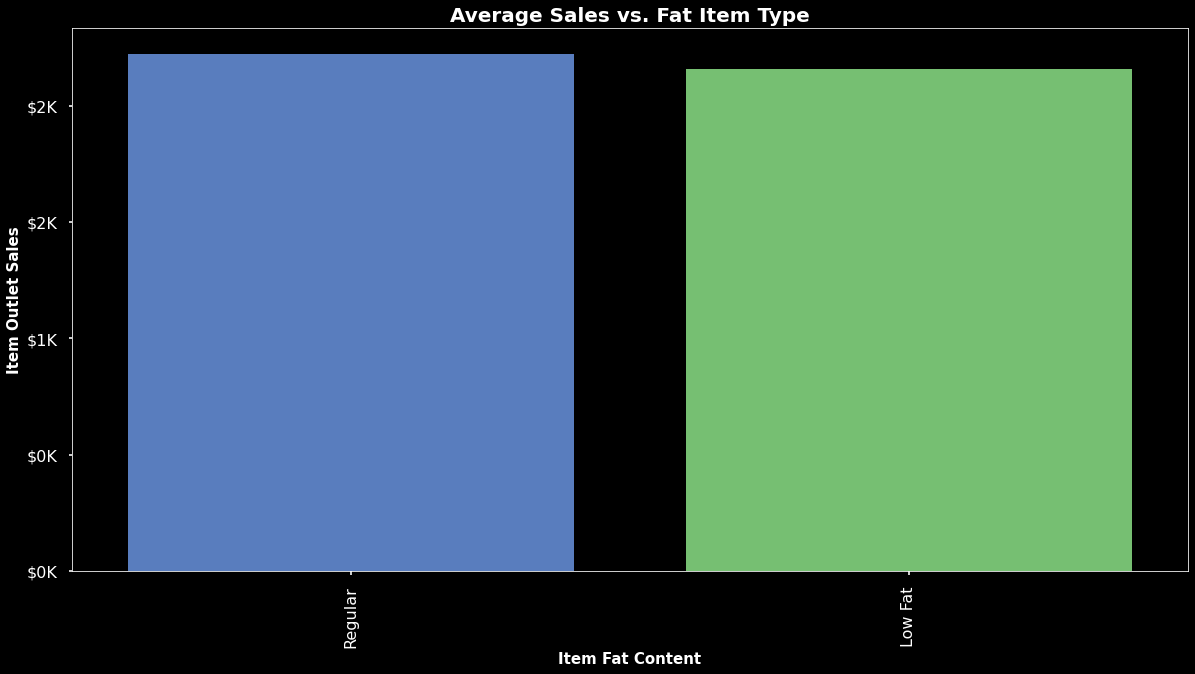

In [36]:
fig, ax = plt.subplots(figsize=(20,10))

ax = sns.barplot(data=df,x='Item_Fat_Content', y = 'Item_Outlet_Sales', order = Fat_means.index, ci = None)
plt.xticks(rotation = 90)
ax.set_title('Average Sales vs. Fat Item Type', fontsize = 20, fontweight = 'bold');
ax.set_xlabel('Item Fat Content', fontsize = 15, fontweight = 'bold')
ax.set_ylabel('Item Outlet Sales', fontsize = 15, fontweight = 'bold');

def hundred_k(x,pos):
  """function for use with matplotlib FuncFormatter - formats money in millions"""
  return f'${x*1e-3:,.0f}K'

price_fmt_100k = FuncFormatter(hundred_k)

ax.yaxis.set_major_formatter(price_fmt_100k)

The Low and reegulaar fat items has similar sales

4.3 Which store has better sales?

In [37]:
store_means = df.groupby('Outlet_Identifier')['Item_Outlet_Sales'].mean().sort_values(ascending=False)
store_means

Outlet_Identifier
OUT027    3694.038558
OUT035    2438.841866
OUT049    2348.354635
OUT017    2340.675263
OUT013    2298.995256
OUT046    2277.844267
OUT045    2192.384798
OUT018    1995.498739
OUT019     340.329723
OUT010     339.351662
Name: Item_Outlet_Sales, dtype: float64

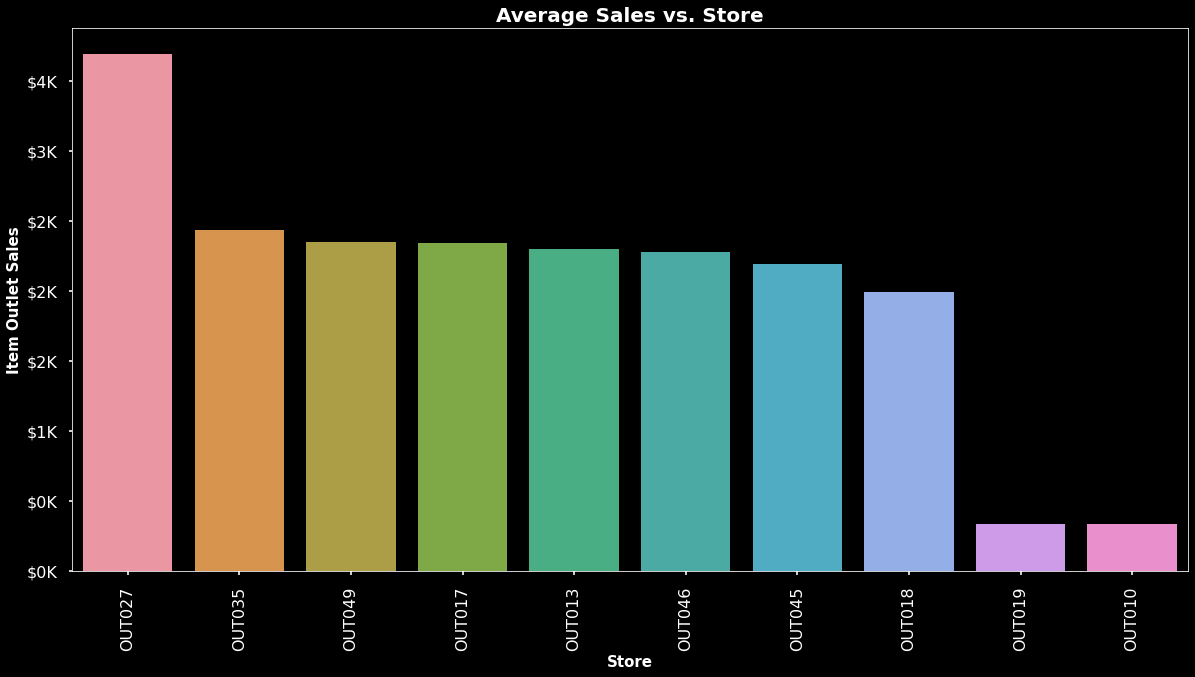

In [38]:
fig, ax = plt.subplots(figsize=(20,10))

ax = sns.barplot(data=df,x='Outlet_Identifier', y = 'Item_Outlet_Sales', order = store_means.index, ci = None)
plt.xticks(rotation = 90)
ax.set_title('Average Sales vs. Store', fontsize = 20, fontweight = 'bold');
ax.set_xlabel('Store', fontsize = 15, fontweight = 'bold')
ax.set_ylabel('Item Outlet Sales', fontsize = 15, fontweight = 'bold');

def hundred_k(x,pos):
  """function for use with matplotlib FuncFormatter - formats money in millions"""
  return f'${x*1e-3:,.0f}K'

price_fmt_100k = FuncFormatter(hundred_k)

ax.yaxis.set_major_formatter(price_fmt_100k)

Store 27 has the higest sales, sotres 19 & 10 the lowest

4.4 Which store sells more by establishment year?

In [39]:
Store_means = df.groupby(['Outlet_Identifier','Outlet_Establishment_Year'])['Item_Outlet_Sales'].mean().sort_values(ascending=False)
Store_means

Outlet_Identifier  Outlet_Establishment_Year
OUT027             1985                         3694.038558
OUT035             2004                         2438.841866
OUT049             1999                         2348.354635
OUT017             2007                         2340.675263
OUT013             1987                         2298.995256
OUT046             1997                         2277.844267
OUT045             2002                         2192.384798
OUT018             2009                         1995.498739
OUT019             1985                          340.329723
OUT010             1998                          339.351662
Name: Item_Outlet_Sales, dtype: float64

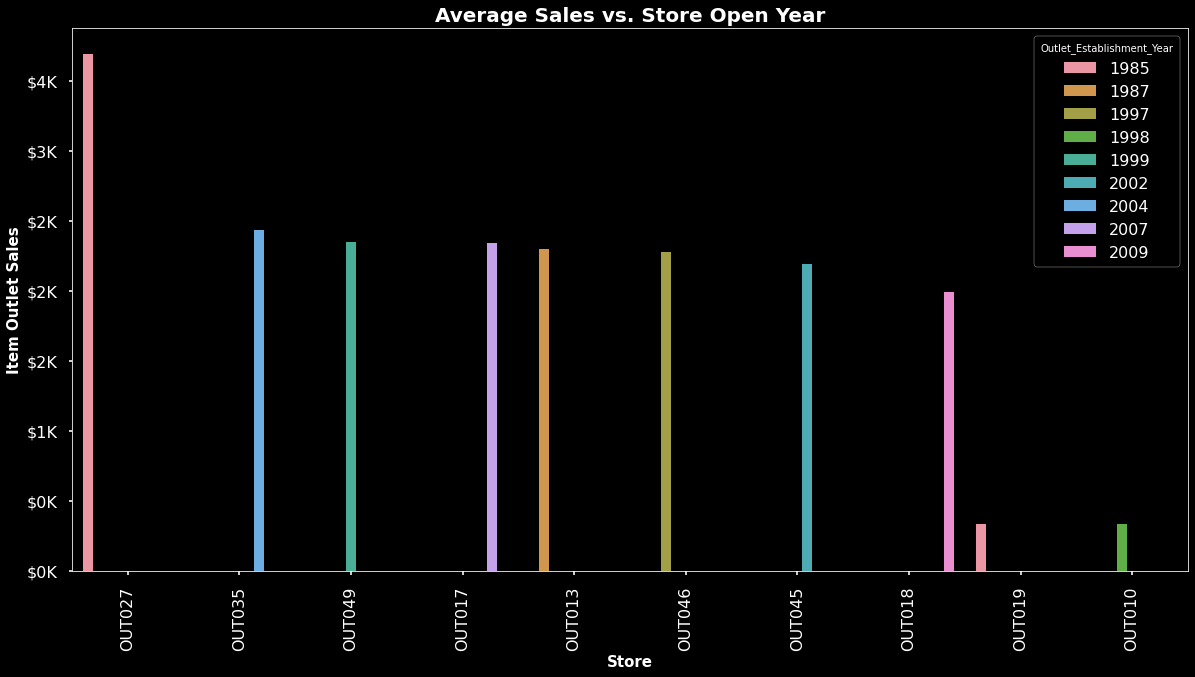

In [40]:
fig, ax = plt.subplots(figsize=(20,10))

ax = sns.barplot(data=df,x='Outlet_Identifier', y = 'Item_Outlet_Sales', order = store_means.index, ci = None, hue = 'Outlet_Establishment_Year')
plt.xticks(rotation = 90)
ax.set_title('Average Sales vs. Store Open Year', fontsize = 20, fontweight = 'bold');
ax.set_xlabel('Store', fontsize = 15, fontweight = 'bold')
ax.set_ylabel('Item Outlet Sales', fontsize = 15, fontweight = 'bold');

def hundred_k(x,pos):
  """function for use with matplotlib FuncFormatter - formats money in millions"""
  return f'${x*1e-3:,.0f}K'

price_fmt_100k = FuncFormatter(hundred_k)

ax.yaxis.set_major_formatter(price_fmt_100k)

Store 27 has open longer than other stores, which might indicate that time in the bussines is important

4.5 Stores sells by location type

In [41]:
Store_ID_Location_means = df.groupby(['Outlet_Identifier','Outlet_Location_Type'])['Item_Outlet_Sales'].mean().sort_values(ascending=False)
Store_ID_Location_means 

Outlet_Identifier  Outlet_Location_Type
OUT027             Tier 3                  3694.038558
OUT035             Tier 2                  2438.841866
OUT049             Tier 1                  2348.354635
OUT017             Tier 2                  2340.675263
OUT013             Tier 3                  2298.995256
OUT046             Tier 1                  2277.844267
OUT045             Tier 2                  2192.384798
OUT018             Tier 3                  1995.498739
OUT019             Tier 1                   340.329723
OUT010             Tier 3                   339.351662
Name: Item_Outlet_Sales, dtype: float64

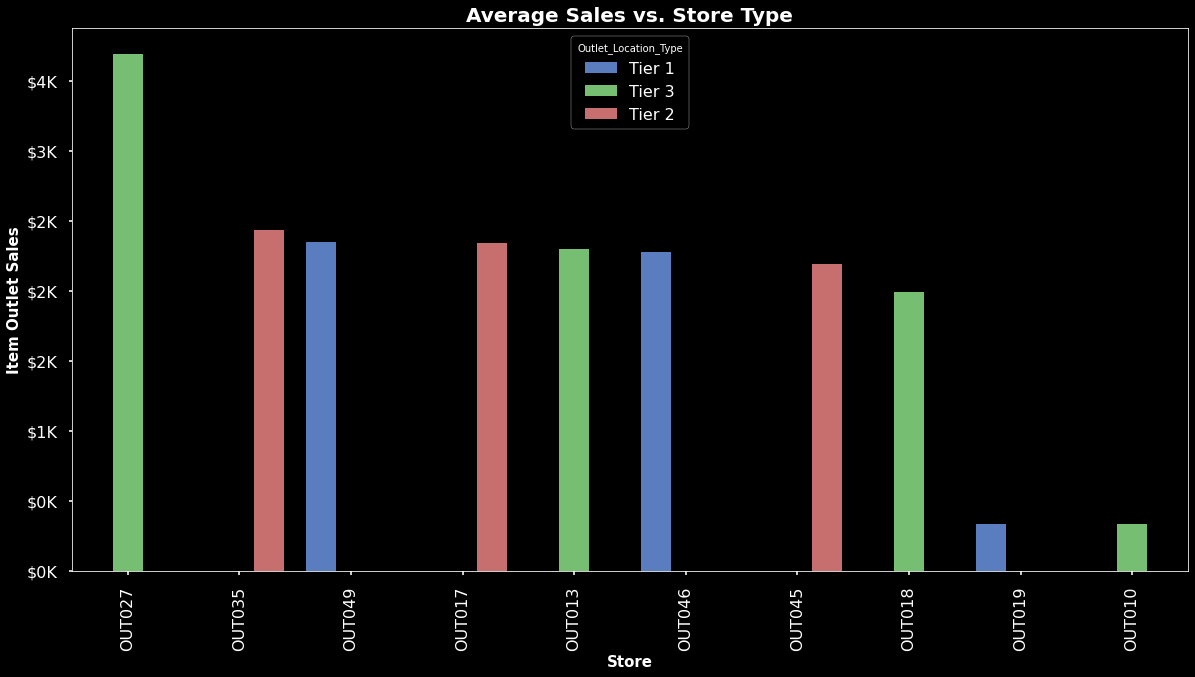

In [42]:
fig, ax = plt.subplots(figsize=(20,10))

ax = sns.barplot(data=df,x='Outlet_Identifier', y = 'Item_Outlet_Sales', order = store_means.index, ci = None, hue = 'Outlet_Location_Type')
plt.xticks(rotation = 90)
ax.set_title('Average Sales vs. Store Type', fontsize = 20, fontweight = 'bold');
ax.set_xlabel('Store', fontsize = 15, fontweight = 'bold')
ax.set_ylabel('Item Outlet Sales', fontsize = 15, fontweight = 'bold');

def hundred_k(x,pos):
  """function for use with matplotlib FuncFormatter - formats money in millions"""
  return f'${x*1e-3:,.0f}K'

price_fmt_100k = FuncFormatter(hundred_k)

ax.yaxis.set_major_formatter(price_fmt_100k)

The sotore location doesn't have a significat effect, the best store (27) and the worst one (10) are from tier 3

<a name="5"></a>
# ⚙️ Project 1 - Part 5: Preprocesing for Machine Learning

<a name="5.1"></a>
## Import all libraries, Load Data & make a copy of the df

⬅️[Go back to TOC](#TOC)

In [45]:
#Mount 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [95]:
##### Imports #####
# Pandas
import pandas as pd
# Numpy
import numpy as np
# Plotting libs
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer

# Models
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor

# Regression Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# Set global scikit-learn configuration 
from sklearn import set_config
# Display estimators as a diagram
set_config(display='diagram') # 'text' or 'diagram'

In [47]:
#Loading data
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Assignments/Data/sales_predictions.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [48]:
# Make a copy of original df to avoid any manipulations 
eda_ml = df.copy()

<a name="5.2"></a>
## Check for duplicates, missing values, errors

⬅️[Go back to TOC](#TOC)

In [49]:
# Display the total sum of missing values
print(f"Missing values: {eda_ml.isna().sum().sum()}")

Missing values: 3873


In [50]:
# Check to see if there are any duplicate rows
print(f"Duplicates values:{eda_ml.duplicated().sum()}")

Duplicates values:0


In [51]:
# Look at the info from the data
eda_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Ckecking columns with missing values:

In [52]:
icols = list(eda_ml.isna().sum().index)
ivalues = list(eda_ml.isna().sum())
idict = dict(zip(icols,ivalues))
tvalues = icols, ivalues

print("Missing values by column\n")

icols_with_missing_values =[]

for k,v in idict.items():
  if not v == 0:
    print(f"col_name[{k}]: {v}")
    icols_with_missing_values.append(k)

Missing values by column

col_name[Item_Weight]: 1463
col_name[Outlet_Size]: 2410


In [53]:
# This colaumns has missing values
print(icols_with_missing_values)

['Item_Weight', 'Outlet_Size']


> Checking for inconsistencies on Object columns

In [54]:
def pp_unique_cat(df):
  categoricals = df.select_dtypes(include='object')

  # check value counts for each object column
  for col in categoricals.columns:
    print(f"Column name: ****{col}****")
    print(categoricals[col].value_counts(), '\n')

pp_unique_cat(eda_ml)

Column name: ****Item_Identifier****
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64 

Column name: ****Item_Fat_Content****
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64 

Column name: ****Item_Type****
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64 

Column name: ****Outlet_Identifier****
OUT027    935
OUT013    932
OUT049    93

> Repalcing inconsisten values: `'low fat'`, '`LF'`, 'reg'

In [55]:
eda_ml.replace({'low fat': 'Low Fat',
            'LF': 'Low Fat',
            'reg':'Regular'}, inplace = True)

>The Item Identifier will not offer good information for the prediction; this feature is like an ID with 1559 unique values. I am dropping this column

In [56]:
eda_ml.drop('Item_Identifier', axis=1, inplace=True)

>The Outlet_Size has 28.3% total missing values (8523/2410) and we don't have enough information to fill this feature, so we are dropping this column too

In [57]:
eda_ml.drop('Item_Fat_Content', axis=1, inplace=True)

<a name="5.3"></a>
## Split the Data (Validation Split)

⬅️[Go back to TOC](#TOC)

In [58]:
# split X and y, you are predicting price
X = eda_ml.drop(columns=['Item_Outlet_Sales']).copy()
y = eda_ml['Item_Outlet_Sales'].copy()

# split training and test
# set random_state to 42 for reproducibility
# for test_size I will use the default value: 25% / 75%
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

<a name="5.4"></a>
## Column Selector

⬅️[Go back to TOC](#TOC)

Identifying features (Numerical, Categorical)
- Numerical: `'Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year'`

- Categoricals:
  - Nominals: `'Outlet_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Type', 'Outlet_Location_Type'`


In [59]:
## Make a column selector for categories & test it /sanity check
num_selector = make_column_selector(dtype_include='number')
cat_selector = make_column_selector(dtype_include='object')


<a name="5.5"></a>
## **Transformers**

⬅️[Go back to TOC](#TOC)

In [60]:
# Instantiate the transformers
scaler = StandardScaler()
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

mean_imputer = SimpleImputer(strategy='mean')

<a name="5.6"></a>
## Pipeline Numeric Data and a Pipeline for Categorical Data

⬅️[Go back to TOC](#TOC)

In [61]:
num_pipeline = make_pipeline(mean_imputer, scaler)


<a name="5.7"></a>
## **Tuples**

⬅️[Go back to TOC](#TOC)

In [62]:
# Create tuples
number_tuple = (num_pipeline, num_selector)
category_tuple = (ohe,cat_selector)

<a name="5.8"></a>
## **ColumnTransformer**

⬅️[Go back to TOC](#TOC)

In [63]:
# Create the preprocessor using make_column_transformer
preprocessor = make_column_transformer(number_tuple, 
                                       category_tuple, 
                                       remainder='drop')

In [64]:
# Fit the column transformer on the X_train
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f3b3440acd0>),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f3b343903a0>)])

<a name="5.9"></a>
## Transform Both Training and Testing Data

⬅️[Go back to TOC](#TOC)

In [65]:
# Transform the X_train and the X_test
X_train_transformed = preprocessor.transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [66]:
X_train_transformed.shape

(6392, 41)

In [67]:
## Check Results
X_train_transformed[:5]

array([[ 0.81724868, -0.71277507,  1.82810922,  1.32784893,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
         0.        ],
       [ 0.5563395 , -1.29105225,  0.60336888,  1.32784893,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.     

<a name="6"></a>
# 📐 Project 1 - Part 6: Maching Learning - Training the Models

⬅️[Go back to TOC](#TOC)

<a name="6.1"></a>
## 🐍 Functions

  **Metrics for X_train**

  mae = mean_absolute_error(y_train, model_pipeline.predict(x_train))

  mse = mean_squared_error(y_train, model_pipeline.predict(x_train))

  rmse = np.sqrt(mean_squared_error(y_train, model_pipeline.predict(x_train)))

  r2 = r2_score(y_train, model_pipeline.predict(x_train))

**Metrics for X_test**

  mae = mean_absolute_error(y_test, model_pipeline.predict(x_test))

  mse = mean_squared_error(y_test, model_pipeline.predict(x_test))

  rmse = np.sqrt(mean_squared_error(y_test, model_pipeline.predict(x_test)))

  r2 = r2_score(y_test, model_pipeline.predict(x_test))

In [68]:
# Create a function to take the true and predicted values
# and print MAE, MSE, RMSE, and R2 metrics
def model_metrics(pipe, x_train, y_train, x_test, y_test, 
                       model_name='Regression Model', ):
  # Train
  mae = round(mean_absolute_error(y_train, pipe.predict(x_train)),4)
  mse = round(mean_squared_error(y_train, pipe.predict(x_train)),4)
  rmse = round(np.sqrt(mean_squared_error(y_train, pipe.predict(x_train))),4)
  r2 = round(r2_score(y_train, pipe.predict(x_train)),7)
  print(f'{model_name} Train Scores')
  print(f'MAE: {mae} \nMSE: {mse} \nRMSE: {rmse} \nR2: {r2}\n')

  # Test
  mae = round(mean_absolute_error(y_test, pipe.predict(x_test)),4)
  mse = round(mean_squared_error(y_test, pipe.predict(x_test)),4)
  rmse = round(np.sqrt(mean_squared_error(y_test, pipe.predict(x_test))),4)
  r2 = round(r2_score(y_test, pipe.predict(x_test)),7)

  # Display the metrics for the model
  print(f'{model_name} Test Scores')
  print(f'MAE: {mae} \nMSE: {mse} \nRMSE: {rmse} \nR2: {r2}\n')

<a name="6.2"></a>
## ▶ Model Data: Baseline Model (Dummy)

⬅️[Go back to TOC](#TOC)

In [69]:
# Create an instance of the model
dummy = DummyRegressor(strategy='mean')

# Create a model pipeline
dummy_pipe = make_pipeline(preprocessor, dummy)

# Fit the model
dummy_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f3b3440acd0>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f3b343903a0>)])),
                ('dummyregressor', DummyRegressor())])

In [70]:
model_metrics(dummy_pipe, x_train=X_train, y_train=y_train, 
                          x_test=X_test, y_test=y_test, 
                           model_name='Dummy Model')

Dummy Model Train Scores
MAE: 1360.2184 
MSE: 2959455.7045 
RMSE: 1720.3069 
R2: 0.0

Dummy Model Test Scores
MAE: 1326.121 
MSE: 2772144.4627 
RMSE: 1664.9758 
R2: -0.0047725



<a name="6.3"></a>
## ▶ Model Data: Linear Regression Model

⬅️[Go back to TOC](#TOC)

In [71]:
# Create an instance of the model
lin_reg = LinearRegression()

# Create a model pipeline
lin_reg_pipe = make_pipeline(preprocessor, lin_reg)

# Fit the model
lin_reg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f3b3440acd0>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f3b343903a0>)])),
                ('linearregression', LinearRegression())])

In [72]:
# Display model performance metrics using a function
model_metrics(pipe=lin_reg_pipe, 
                x_train=X_train, y_train=y_train, 
                          x_test=X_test, y_test=y_test, 
                           model_name='Dummy Model')

Dummy Model Train Scores
MAE: 847.2994 
MSE: 1298294.1143 
RMSE: 1139.4271 
R2: 0.5613065

Dummy Model Test Scores
MAE: 804.0018 
MSE: 1192926.5671 
RMSE: 1092.2118 
R2: 0.56762



<a name="6.4"></a>
## ▶ Model Data: Decision Tree Regressor Model

<a name="6.5"></a>
### **High Bias Version**

⬅️[Go back to TOC](#TOC)

In [73]:
# Create an instance of the model
dec_tree = DecisionTreeRegressor(max_depth=1, random_state = 42)
# Create a model pipeline
dec_tree_pipe = make_pipeline(preprocessor, dec_tree)
# Fit the model
dec_tree_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f3b3440acd0>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f3b343903a0>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(max_depth=1, random_state=42))])

In [74]:
# Display the Model's metrics
model_metrics(dec_tree_pipe, x_train=X_train, y_train=y_train, 
                          x_test=X_test, y_test=y_test, 
                           model_name='High Variance Decision Tree Model')

High Variance Decision Tree Model Train Scores
MAE: 1138.5329 
MSE: 2255705.5459 
RMSE: 1501.9006 
R2: 0.2377972

High Variance Decision Tree Model Test Scores
MAE: 1112.1494 
MSE: 2125288.2422 
RMSE: 1457.8368 
R2: 0.2296826



In [75]:
# Display the list of available hyperparameters for tuning
dec_tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 1,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [76]:
# Obtain the max_depth from the pipeline and assign it to the variable max_depth
max_depth = dec_tree_pipe['decisiontreeregressor'].get_depth()
# Display max_depth
max_depth

1

<a name="6.6"></a>
### **High Variance Version**

In [77]:
# Create an instance of the model
dec_tree = DecisionTreeRegressor(max_depth=None, random_state = 42)
# Create a model pipeline
dec_tree_pipe = make_pipeline(preprocessor, dec_tree)
# Fit the model
dec_tree_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f3b3440acd0>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f3b343903a0>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [78]:
# Display the Model's metrics
model_metrics(dec_tree_pipe, x_train=X_train, y_train=y_train, 
                          x_test=X_test, y_test=y_test, 
                           model_name='High Variance Decision Tree Model')

High Variance Decision Tree Model Train Scores
MAE: 0.0 
MSE: 0.0 
RMSE: 0.0 
R2: 1.0

High Variance Decision Tree Model Test Scores
MAE: 1042.8437 
MSE: 2232939.3566 
RMSE: 1494.3023 
R2: 0.1906641



In [79]:
# Display the list of available hyperparameters for tuning
dec_tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [80]:
# Obtain the max_depth from the pipeline and assign it to the variable max_depth
max_depth = dec_tree_pipe['decisiontreeregressor'].get_depth()
# Display max_depth
max_depth

40

<a name="6.7"></a>
### Bias Variance Balancec Version

⬅️[Go back to TOC](#TOC)

In [81]:
# Create a range of max_depth values to evaluate
depths = range(1, max_depth+1)

# Create a dataframe to store Train and Test  R2 scores
scores = pd.DataFrame(columns=['Train Score', 'Test Score'], index=depths)

# Loop through the max_depth values
for depth in depths:
  # Create an instance of the model
  dec_tree = DecisionTreeRegressor(max_depth=depth, random_state = 42)
  # Create a model pipeline
  dec_tree_pipe = make_pipeline(preprocessor, dec_tree)
  # Fit the model
  dec_tree_pipe.fit(X_train, y_train)

  # Obtain the predictions from the model
  train_pred = dec_tree_pipe.predict(X_train)
  test_pred = dec_tree_pipe.predict(X_test)

  # Obtain the R2 scores for Train and Test
  train_r2score = r2_score(y_train, train_pred)
  test_r2score = r2_score(y_test, test_pred)

  # Save the Train and Test R2 Score for this depth in the scores dataframe
  scores.loc[depth, 'Train Score'] = train_r2score
  scores.loc[depth, 'Test Score'] = test_r2score

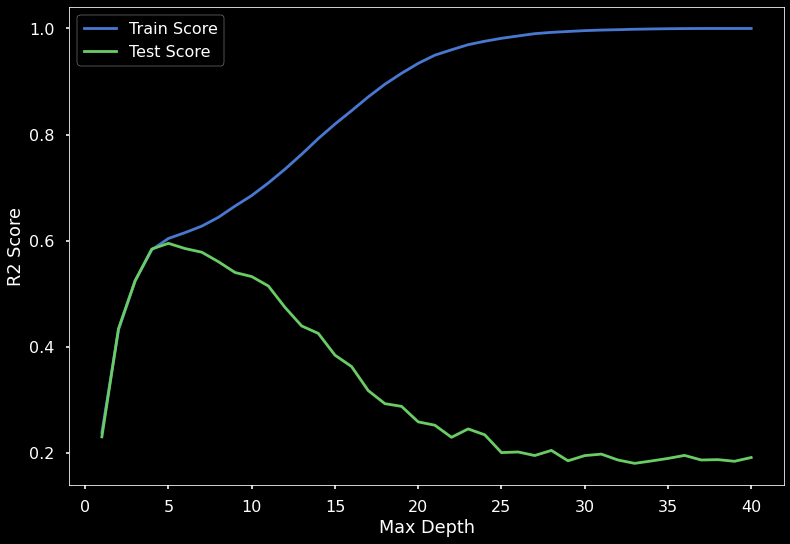

In [82]:
# Visualize the max_depths to display which achieves the highest R2 score
plt.plot(depths, scores['Train Score'], label='Train Score')
plt.plot(depths, scores['Test Score'], label='Test Score')
plt.ylabel('R2 Score')
plt.xlabel('Max Depth')
plt.legend()
plt.show()

In [83]:
# Create a version on the scores dataframe
# sorted by highest Test Scores
sorted_scores = scores.sort_values(by='Test Score', ascending=False)
# Display the first (5) rows of the dataframe
sorted_scores.head()

,Train Score,Test Score
5,0.603921,0.594685
6,0.614956,0.584819
4,0.582625,0.584005
7,0.627126,0.577981
8,0.643786,0.560061


In [84]:
#sort the dataframe by test scores and save the index (k) of the best score
best_depth = sorted_scores.index[0]
best_depth

5

<a name="6.8"></a>
### 🚀 Reevaluating Decision Tree Model

⬅️[Go back to TOC](#TOC)

In [85]:
# Create an instance of the model
dec_tree = DecisionTreeRegressor(max_depth=best_depth, random_state = 42)
# Create a model pipeline
dec_tree_pipe = make_pipeline(preprocessor, dec_tree)
# Fit the model
dec_tree_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f3b3440acd0>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f3b343903a0>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(max_depth=5, random_state=42))])

In [86]:
# Display the list of available hyperparameters for tuning
dec_tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [87]:
# Display the Model's metrics
model_metrics(dec_tree_pipe, x_train=X_train, y_train=y_train, 
                          x_test=X_test, y_test=y_test, 
                           model_name='Tuned Decision Tree Model')

Tuned Decision Tree Model Train Scores
MAE: 762.6851 
MSE: 1172179.4097 
RMSE: 1082.6723 
R2: 0.6039206

Tuned Decision Tree Model Test Scores
MAE: 738.4201 
MSE: 1118255.1591 
RMSE: 1057.4758 
R2: 0.5946849



<a name="6.9"></a>
## ▶ Model Data: Ramdom Forest Model

⬅️[Go back to TOC](#TOC)

In [88]:
# Create an instance of the model
rf_tree = RandomForestRegressor(random_state = 42)
# Create a model pipeline
rf_tree_pipe = make_pipeline(preprocessor, rf_tree)
# Fit the model
rf_tree_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f3b3440acd0>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f3b343903a0>)])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [89]:
# Display the Model's metrics
model_metrics(rf_tree_pipe, x_train=X_train, y_train=y_train, 
                          x_test=X_test, y_test=y_test, 
                           model_name='Untuned Random Forest Model')

Untuned Random Forest Model Train Scores
MAE: 296.433 
MSE: 183208.7311 
RMSE: 428.0289 
R2: 0.9380938

Untuned Random Forest Model Test Scores
MAE: 763.4065 
MSE: 1200432.0348 
RMSE: 1095.6423 
R2: 0.5648996



<a name="6.10"></a>
### Creating a Loop to Tune n_estimators for Random Forest Regressor Model

⬅️[Go back to TOC](#TOC)

In [90]:
#create a range of max_depth values
n_estimators = [50, 100, 200, 300, 400, 500, 600, 700, 800, 1000, 2000, 3000, 4000, 5000]

#create a dataframe to store train and test scores.
scores = pd.DataFrame(columns=['Train', 'Test'], index=n_estimators)

#loop over the values in depths
for n in n_estimators:
  #fit a new model with max_depth
  rf = RandomForestRegressor(random_state = 42, n_estimators=n)

  #put the model into a pipeline
  rf_pipe = make_pipeline(preprocessor, rf)
  
  #fit the model
  rf_pipe.fit(X_train, y_train)
  
  #create prediction arrays
  train_pred = rf_pipe.predict(X_train)
  test_pred = rf_pipe.predict(X_test)
  
  #evaluate the model using R2 Score
  train_r2score = r2_score(y_train, train_pred)
  test_r2score = r2_score(y_test, test_pred)
  
  #store the scores in the scores dataframe
  scores.loc[n, 'Train'] = train_r2score
  scores.loc[n, 'Test'] = test_r2score

<a name="6.11"></a>
### Plotting Scores for Random Forest Train & Test Visually

⬅️[Go back to TOC](#TOC)

In [91]:
scores

,Train,Test
50,0.935496,0.55894
100,0.938094,0.5649
200,0.939273,0.561782
300,0.939807,0.561934
400,0.940082,0.561803
500,0.94008,0.561863
600,0.940338,0.561257
700,0.940505,0.561119
800,0.940638,0.560725
1000,0.940637,0.561006


<a name="6.12"></a>
### Best n_estimators for Random Forest Model

⬅️[Go back to TOC](#TOC)

In [92]:
best_estimators = scores.sort_values(by='Test', ascending=False).index[0]
best_estimators

100

<a name="6.13"></a>
### 🚀 Reevaluating Random Forest Regressor Model

⬅️[Go back to TOC](#TOC)

In [93]:
best_rf = RandomForestRegressor(n_estimators=best_estimators)

best_rf_pipe = make_pipeline(preprocessor, best_rf)

best_rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f3b3440acd0>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f3b343903a0>)])),
                ('randomforestregressor', RandomForestRegressor())])

In [94]:
# Display the Model's metrics
model_metrics(best_rf_pipe, x_train=X_train, y_train=y_train, 
                          x_test=X_test, y_test=y_test, 
                           model_name='Tuned Random Forest Model')

Tuned Random Forest Model Train Scores
MAE: 295.3615 
MSE: 179682.3558 
RMSE: 423.8896 
R2: 0.9392853

Tuned Random Forest Model Test Scores
MAE: 767.8727 
MSE: 1219558.1845 
RMSE: 1104.3361 
R2: 0.5579673



<a name="6.14"></a>
## 📕 Observations and Recommendations





⬅️[Go back to TOC](#TOC)

| Model             | TRAINING R^2 SCORE | TESTING R^2 SCORE |
| ----------------- | :----------------: | :---------------: |
| Base (Dummy)      |        0.0         |    -0.0047725     |
| Linear Regression |     0.5613065      |     0.567620      |
| Decision Trees    |     0.6039206      |     0.5946849     |
| Random Forest     |     0.9392853      |     0.5579673     |
|                   |                    |                   |

- The Base Model perfrommed the wrost of all simulations
- The Linear Regression Model has good Variance with poor Bias
- The Decision, Ramdon Forest and Bagged Tree Moodels have similar performance: High Variance with some Bias on the Testing R^2 scores

>I recommend using the Random Forest, which has the best Testing Score (R^2) of `0.5946849`. This model still has some bias. However, this model has the best performance on the testing set with LOW Variance